## Machine Learning Project: Time Series
This project we will work on the desiease type a person have it will be the Multiclass Classification problem, The dataset is : https://github.com/abdelDebug/lung_disease.git

## Steps:

1) Data Preprocessing.

2) Exploratory Data Analysis (EDA).

3) Model Selection and Design:

    a. Logistic Regression

    b. Support Vector Machine

    c.  Decision Tree
    
    d.  Random Forest
    
    e.  K-Nearest Neighbors
    
    f. Gradient Boosting

4) Model Evaluation:

    a. Accuracy.

    b. precision.

    c. recall.

    d. F1-score.


---



## Data Preprocessing:
lets walk through the data.

In [ ]:
# lets import our data
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lung_disease_v1 (1).csv")

In [ ]:
df.head()


,patient_id,age,sex,bmi,smoking_status,pack_years,pm25_exposure,occupation,family_history,cough,...,dlco_pct_pred,cxr_finding,ct_nodule_size_mm,ct_emphysema_pct,sixmwd_m,hypertension,diabetes,hospital_visits_last_year,disease_type,severity
0,1,49,Male,20.1,Never,21.0,20.8,Office,NaN,1,...,82.1,Normal,3.0,11.9,447,1,1,0,Asthma,Moderate
1,2,61,Female,28.4,Current,34.1,10.8,Office,NaN,0,...,81.1,Normal,5.9,2.1,394,0,0,0,Lung Cancer,Mild/None
2,3,70,Male,22.2,Current,15.7,12.0,Manufacturing,NaN,1,...,85.4,Consolidation,2.8,4.8,309,0,1,0,Pneumonia,Mild/None
3,4,47,Male,23.1,Current,49.0,20.0,Manufacturing,NaN,0,...,49.0,Normal,1.8,29.4,190,0,0,0,COPD,Moderate
4,5,70,Female,29.0,Former,6.0,6.0,Office,NaN,0,...,81.6,Normal,1.0,9.5,314,0,0,0,Healthy,Mild/None


In [ ]:
# will check the length of or dataset
len(df)

12000

In [ ]:
# lets see our dataset in details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 12000 non-null  int64  
 1   age                        12000 non-null  int64  
 2   sex                        12000 non-null  object 
 3   bmi                        12000 non-null  float64
 4   smoking_status             12000 non-null  object 
 5   pack_years                 12000 non-null  float64
 6   pm25_exposure              12000 non-null  float64
 7   occupation                 12000 non-null  object 
 8   family_history             4824 non-null   object 
 9   cough                      12000 non-null  int64  
 10  dyspnea                    12000 non-null  int64  
 11  wheeze                     12000 non-null  int64  
 12  chest_pain                 12000 non-null  int64  
 13  fever                      12000 non-null  int

In [ ]:
# lets see our data in statistical way
df.describe()

,patient_id,age,bmi,pack_years,pm25_exposure,cough,dyspnea,wheeze,chest_pain,fever,...,fev1_fvc,fev1_pct_pred,fvc_pct_pred,dlco_pct_pred,ct_nodule_size_mm,ct_emphysema_pct,sixmwd_m,hypertension,diabetes,hospital_visits_last_year
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,58.070833,27.008608,14.767758,15.114308,0.417333,0.397250,0.246750,0.138083,0.167000,...,0.740610,83.805633,94.915475,81.511558,4.644267,8.275508,403.809167,0.347333,0.184250,0.615833
std,3464.24595,14.741634,4.961936,14.848183,6.689190,0.493139,0.489349,0.431138,0.345002,0.372991,...,0.100471,18.773718,12.051371,17.630906,5.926454,8.290305,109.520138,0.476143,0.387704,0.738892
min,1.00000,18.000000,16.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.320000,20.000000,49.600000,20.000000,0.000000,0.000000,-29.000000,0.000000,0.000000,0.000000
25%,3000.75000,48.000000,23.500000,2.700000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.680000,72.200000,86.800000,70.800000,1.000000,2.500000,329.000000,0.000000,0.000000,0.000000
50%,6000.50000,58.000000,27.000000,10.300000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.750000,85.100000,94.900000,82.400000,3.000000,6.300000,405.000000,0.000000,0.000000,0.000000
75%,9000.25000,68.000000,30.400000,22.800000,19.700000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.810000,96.500000,103.100000,93.500000,5.400000,10.900000,478.000000,1.000000,0.000000,1.000000
max,12000.00000,90.000000,45.600000,81.800000,41.300000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.950000,140.000000,140.000000,139.500000,47.800000,51.600000,816.000000,1.000000,1.000000,5.000000


In [ ]:
# lets check if there are any missing values or not
df.isna().sum()


,0
patient_id,0
age,0
sex,0
bmi,0
smoking_status,0
pack_years,0
pm25_exposure,0
occupation,0
family_history,7176
cough,0


In [ ]:
#here we got missing values in family-history lets fill it with non null values
df['family_history'].fillna('Unknown', inplace=True)


/tmp/ipython-input-604075376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['family_history'].fillna('Unknown', inplace=True)


## Graphs:
we will visulaize our dataset in depth and see how we can plot some import visualization.

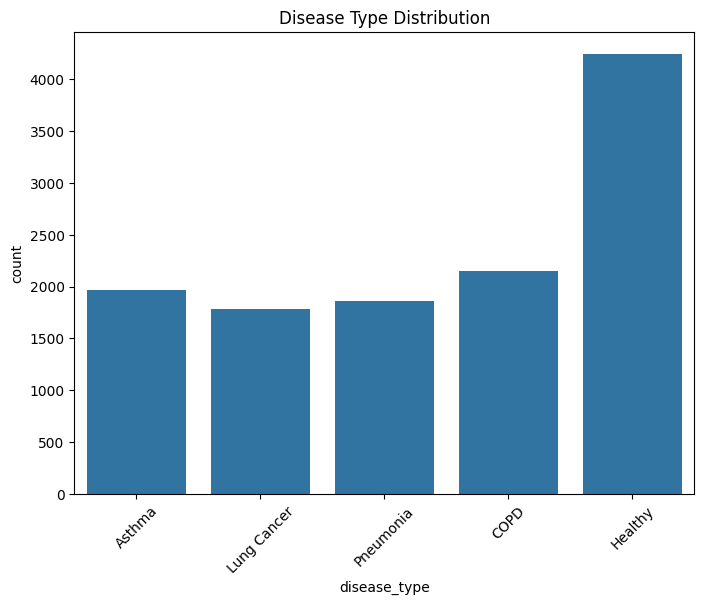

,count
disease_type,
Healthy,4243
COPD,2147
Asthma,1968
Pneumonia,1861
Lung Cancer,1781


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='disease_type')
plt.title('Disease Type Distribution')
plt.xticks(rotation=45)
plt.show()

df['disease_type'].value_counts()


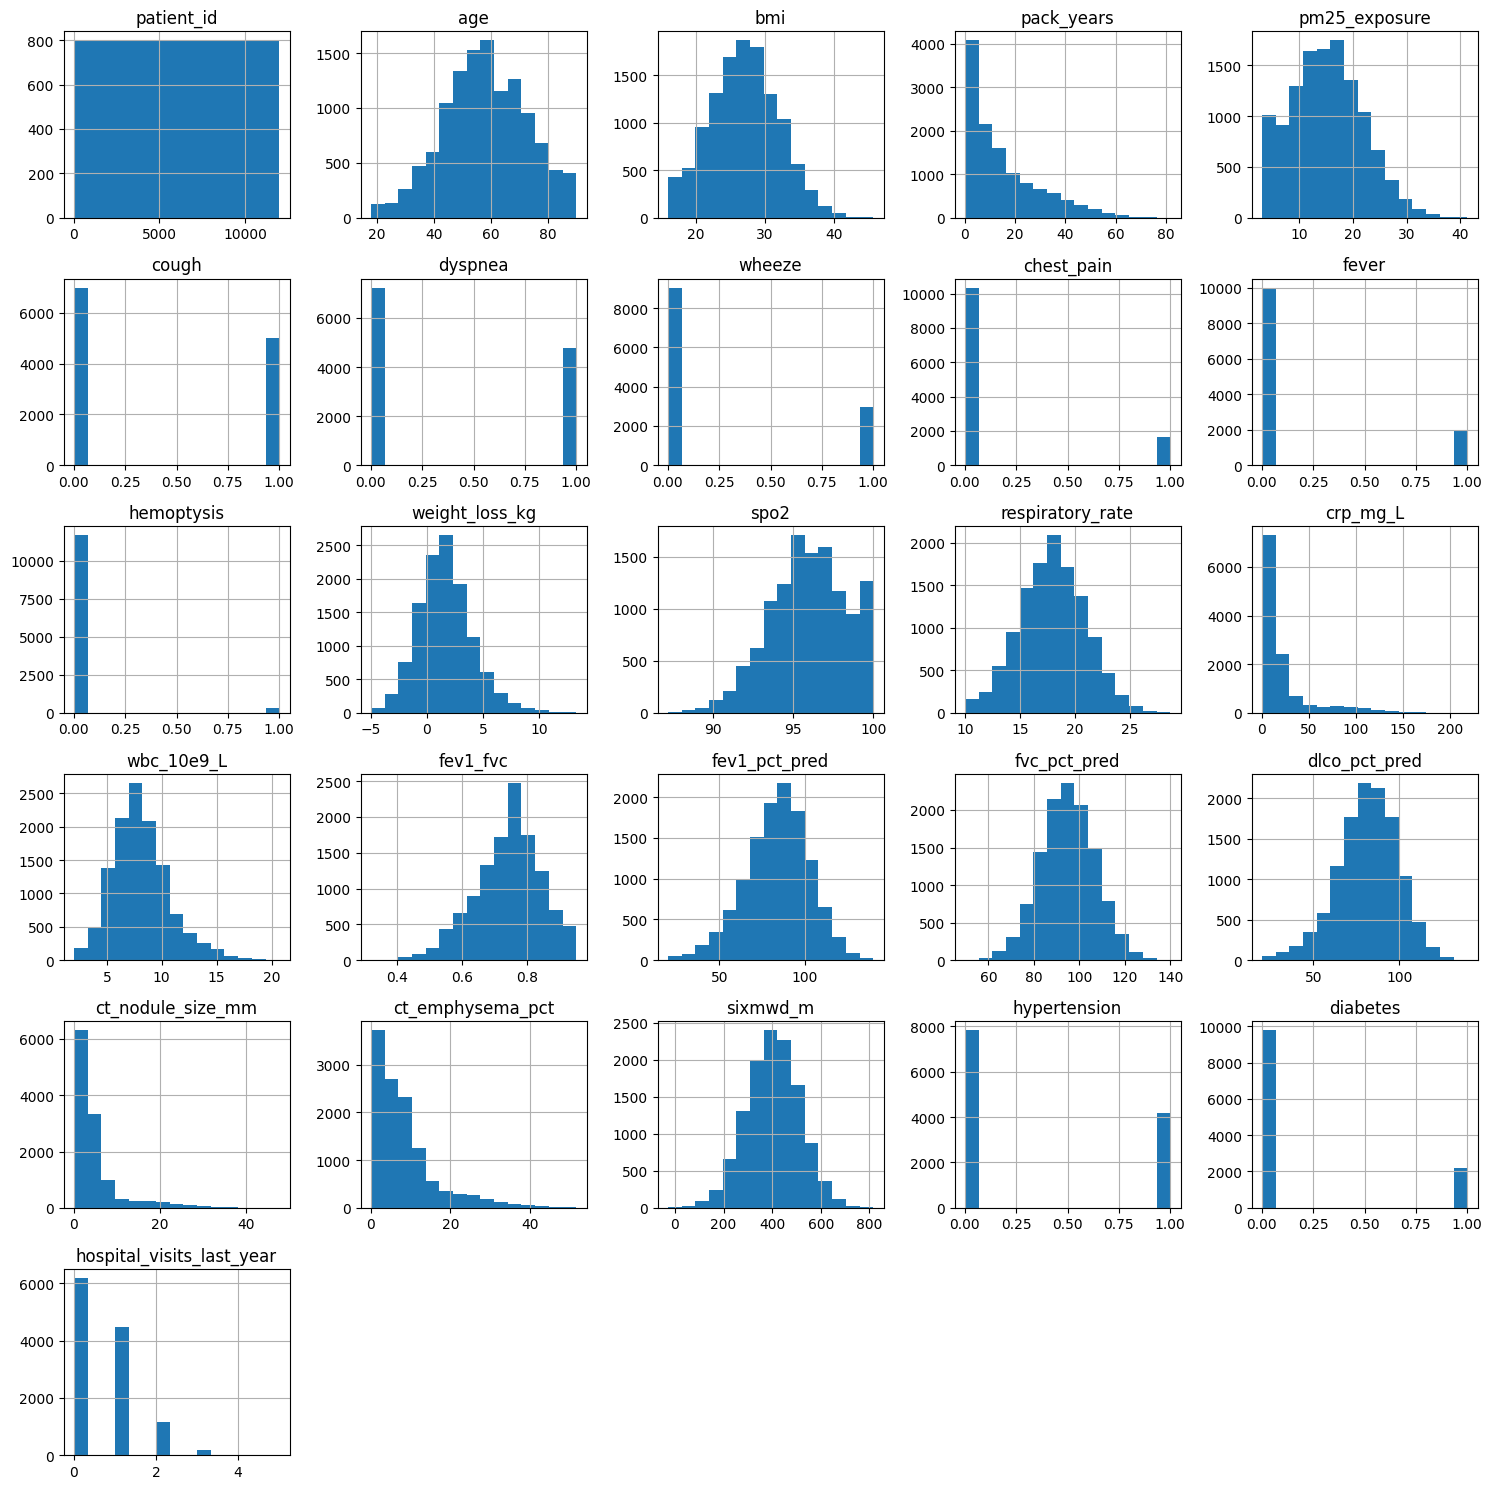

In [ ]:
num_features = df.select_dtypes(include=['float64','int64']).columns

df[num_features].hist(bins=15, figsize=(15,15))
plt.tight_layout()
plt.show()


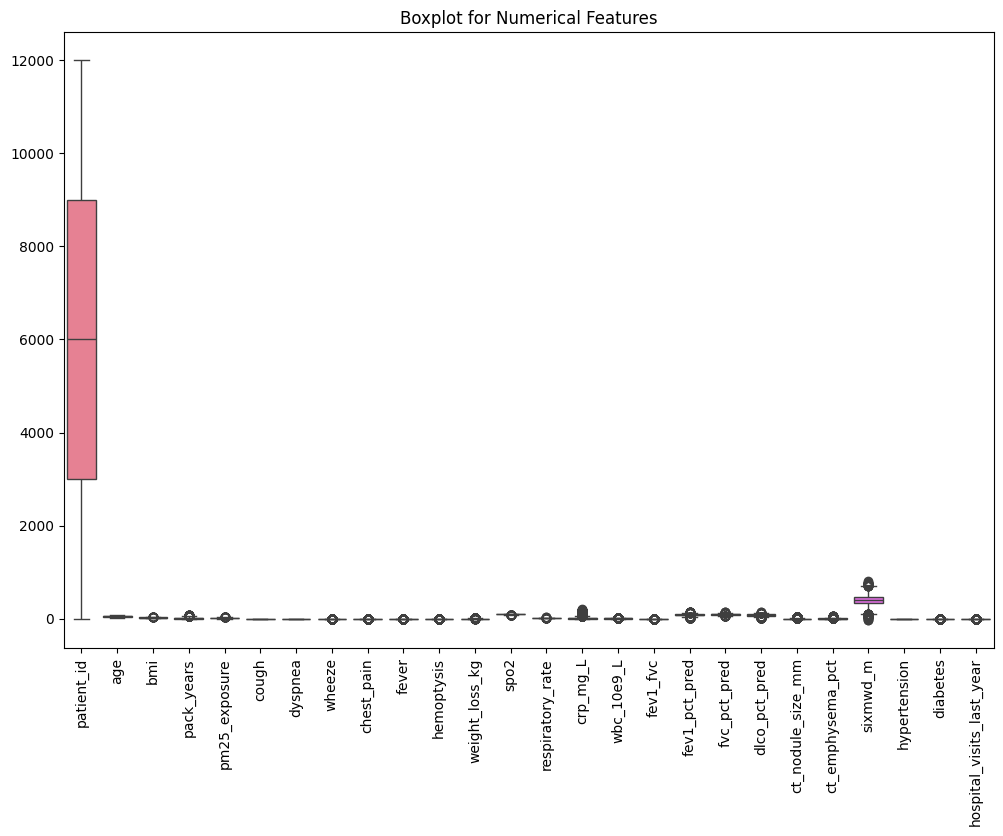

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=90)
plt.title('Boxplot for Numerical Features')
plt.show()


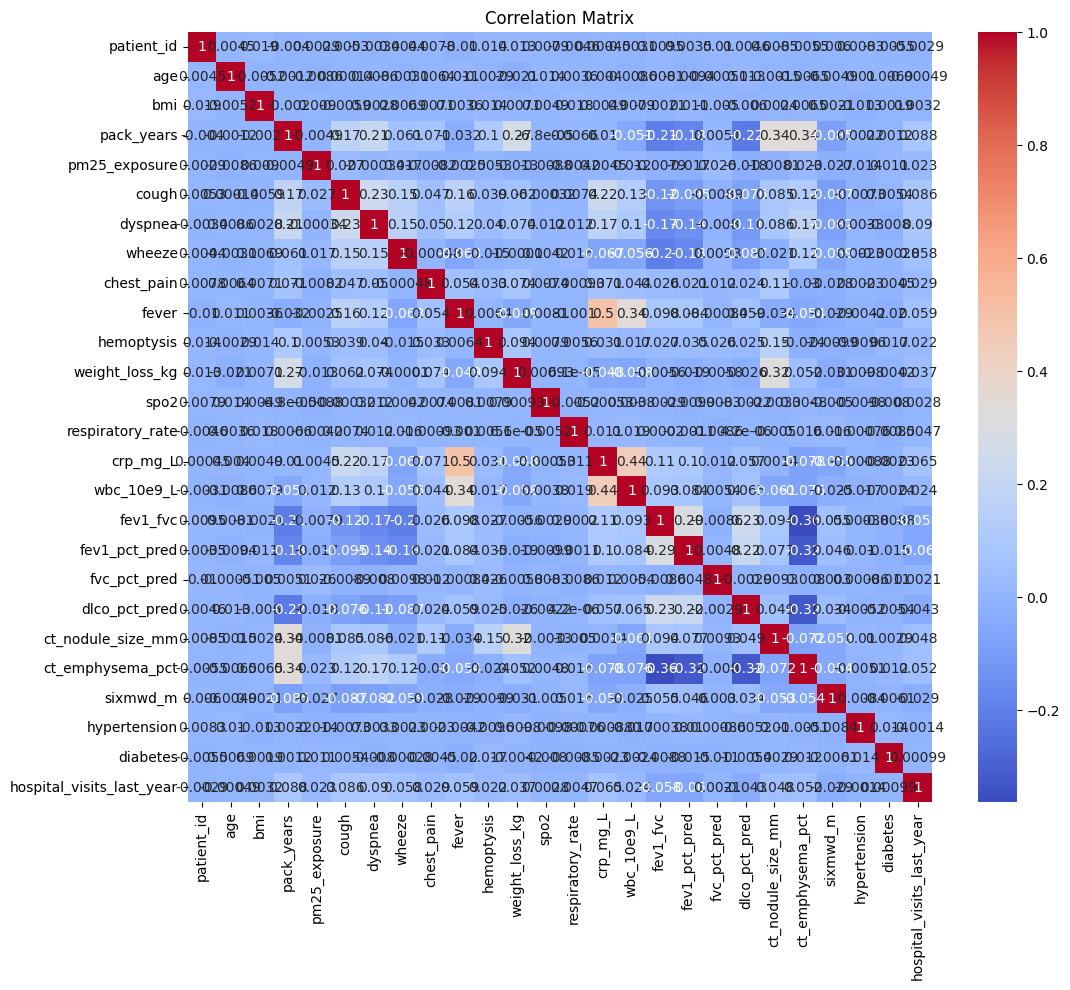

In [ ]:
corr = df[num_features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


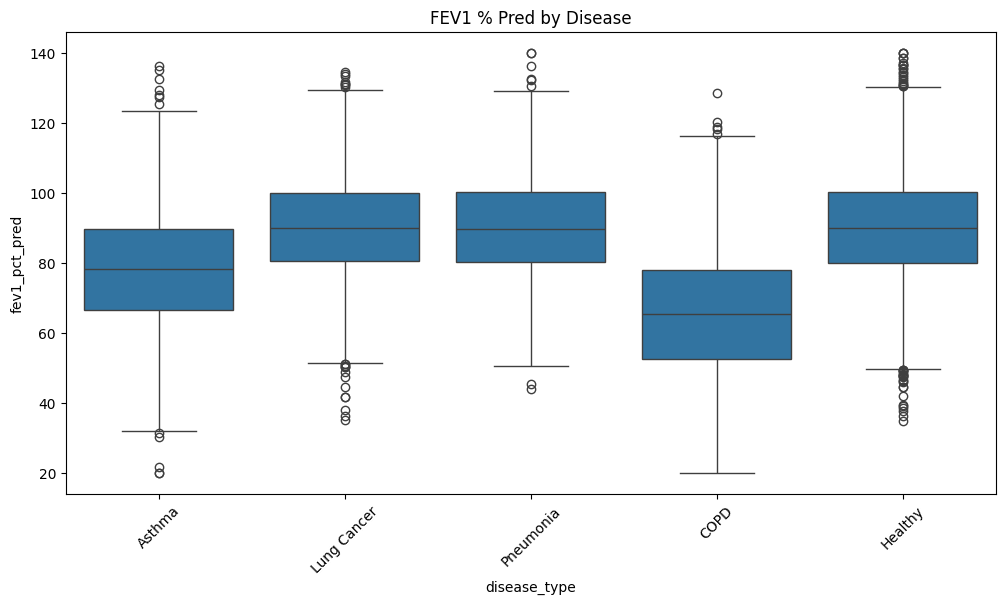

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='disease_type', y='fev1_pct_pred')
plt.xticks(rotation=45)
plt.title('FEV1 % Pred by Disease')
plt.show()


# we will encode or data set

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_features = df.select_dtypes(include=['object']).columns.drop('disease_type')

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[cat_features])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_features))
df_processed = pd.concat([df.drop(columns=cat_features), encoded_df], axis=1)


## We will scale our dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_processed[num_features])
scaled_df = pd.DataFrame(scaled, columns=num_features)

df_processed.update(scaled_df)


/tmp/ipython-input-892852593.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.73190648 -1.7316178  -1.73132913 ...  1.73132913  1.7316178
  1.73190648]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_processed.update(scaled_df)
/tmp/ipython-input-892852593.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.61534641  0.19870856  0.80924978 ... -0.34399476 -1.29372555
  1.21627727]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_processed.update(scaled_df)
/tmp/ipython-input-892852593.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.18159474 -0.84631385  1.18159474 ...  1.18159474  1.18159474
 -0.84631385]' has dtype incompatible with int64, please explicitly cast to a

# Splitting the data:
here we will split our data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X = df_processed.drop(columns=['disease_type'])
y = df['disease_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#Model Training:
here our train data is ready lets train models now.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
SVM trained.
Decision Tree trained.
Random Forest trained.
KNN trained.


# Evaluation:
we have successfully train our all models now let just evaluate.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    preds = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average='macro'),
        "Recall": recall_score(y_test, preds, average='macro'),
        "F1 Score": f1_score(y_test, preds, average='macro')
    })

import pandas as pd
pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.942083,0.948901,0.938750,0.943417
1,SVM,0.937500,0.946837,0.930628,0.938116
2,Decision Tree,0.889583,0.892957,0.892373,0.892444
3,Random Forest,0.942500,0.952292,0.936561,0.943491
4,KNN,0.863750,0.894430,0.839160,0.861830


## BEst model:
here we can see that RandomForest model outperform.

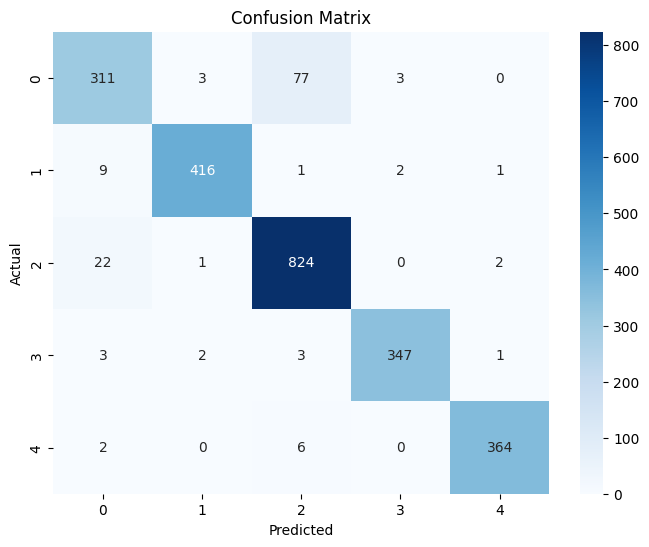

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

best_model = models['Random Forest']
cm = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


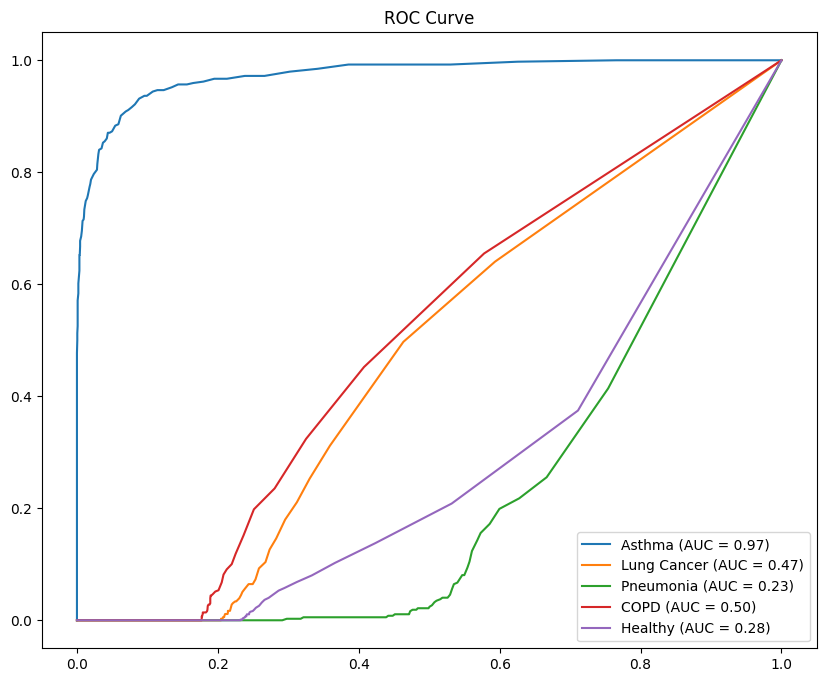

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = y.unique()
y_bin_test = label_binarize(y_test, classes=classes)
y_bin_pred = best_model.predict_proba(X_test)

plt.figure(figsize=(10,8))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_bin_test[:, i], y_bin_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")

plt.legend()
plt.title('ROC Curve')
plt.show()


## Conclusion:
The best model which outperform other model is Random Forest